**Exercise 2 - Linear and non-linear regression**

---

This exercise will be about linear and non-linear regression. Given a set of data points your task will be to implement the functions that calculate the function $\theta$ parameters to fit the data.

In [1]:
# import libraries used during this exercise
# it may be necessary to uncomment the two following pip commands
# !pip install pandas
# !pip install matplotlib
import pandas as pd
import numpy as np
from mlrcv.core import *
%matplotlib notebook
%matplotlib inline

C:\Users\prasa\AppData\Local\Temp\ipykernel_36800\1505952775.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In this exercise we will use a toy dataset with $x$ and $y$ values, where the $x$ is the observed data that should be used to predict the $y$ values. To predict the $y$ values you should implement the Maximum Likelihood Estimation method.

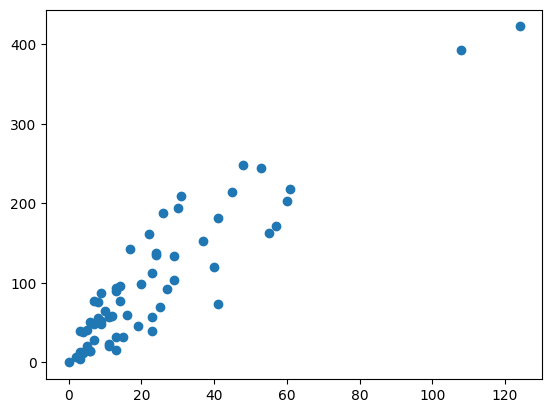

In [2]:
# Dataset read
df = pd.read_csv('data/linear.csv')
x = df['X'].values
y = df['Y'].values

plot_regression(x, y)

**2.1 Linear regression \[4\]**

---

In this first task, given the loaded data *x* and *y* you should implement the *LinearRegression* class functions in the *mlrcv/regression.py* file to calculate the $\theta_0$ and $\theta$ parameters of the linear function $ f(x) = x^T\theta + \theta_0$ that will fit the data:
- *calculate_theta*
- *predict_y*

You should first implement *split_train_test* in *mlrcv/utils.py* to split your dataset in train and validation sets. Usually the data is splitted in train, validation and test sets, but in this exercise we are working with a small simple dataset so we will abstract this and split only on train and validation sets.
(**Note:** The *plot_regression* function is already implemented.)

In [3]:
from mlrcv.regression import *
from mlrcv.utils import *

# split the data
x_train, y_train, x_val, y_val = split_data(x, y)
# plot_regression(x,y)

(32,) (32,)


c:\Users\prasa\Desktop\Masters\second sem\MLRCV\Ex2\assignment\mlrcv\regression.py:22: RuntimeWarning: divide by zero encountered in scalar divide
  theta_1 =np.sum((x-x_mean)*(y-y_mean) )/np.sum(x-x_mean)
c:\Users\prasa\Desktop\Masters\second sem\MLRCV\Ex2\assignment\mlrcv\regression.py:42: RuntimeWarning: invalid value encountered in add
  y_pred = self.theta_0 + self.theta_1*x


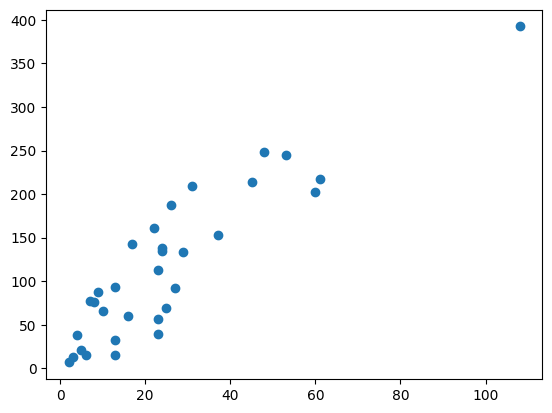

In [4]:
model = LinearRegression()
model.calculate_theta(x_train, y_train)
print(x_train.shape, y_train.shape)

y_pred = model.predict_y(x_train)

plot_regression(x_train, y_train, y_pred)

If your implementation have worked, you should see in the plot a red line passing right on the middle of your data, that line is your regression model, which predict a *y* given an input *x*.


**2.2 Non-linear regression \[4\]**

---

In some cases your data may not have a linear relation, which means that linear regression may not correctly fit your data. In this second task you should deal with non-linear regression.

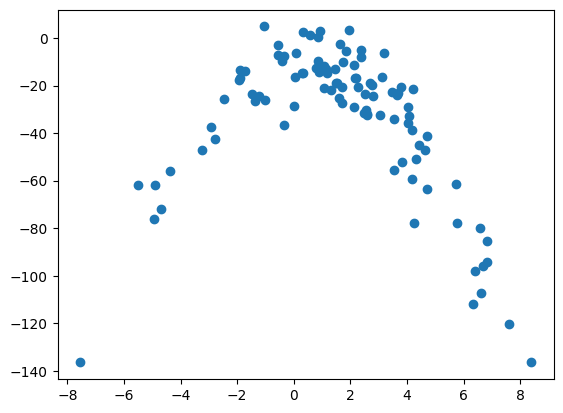

In [5]:
# Dataset read
df = pd.read_csv('data/non_linear.csv')
x = df['X'].values
y = df['Y'].values

plot_regression(x, y)

If you run the same implementations from the last task, you should see that the regression model can not properly fit non-linear data.

In [6]:
x_train, y_train, x_val, y_val = split_data(x, y)

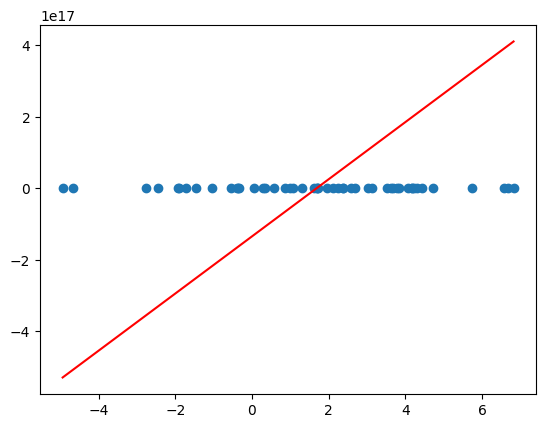

In [7]:
model = LinearRegression()
model.calculate_theta(x_train, y_train)
y_pred = model.predict_y(x_train)
plot_regression(x_train, y_train, y_pred)

For that, a non-linear regression should be implemented in order to fit non-linear data. In the next task you should implement the functions from the *NonLinearRegression* class to calculate the $\theta$ parameters (now it will be a vector of parameters) of the regression function $f(x) = \phi(x)^T\theta$ for non-linear data, where $\phi$ is a non-linear transformation, e.g. polynomial transformation. Your implementation should be able to build a model for *n-degree* polynoms, where the polynom degree will be passed as argument.

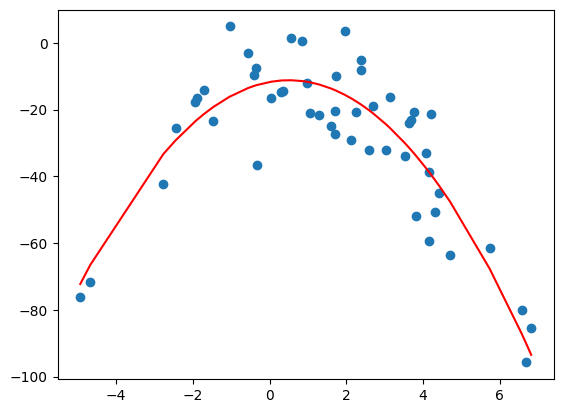

In [8]:
from mlrcv.regression import *

model = NonLinearRegression()
model.calculate_theta(x_train, y_train, degree=2)
y_pred = model.predict_y(x_train)

plot_regression(x_train, y_train, y_pred)

If you have implemented it correctly you should se a curved line passing over your data. The non-linear regression fits better our non-linear data since now our model is a polynom and not just a line anymore.

**2.3 Evaluating your model \[2\]**

---

With a non-linear regression model you can increase your polynom degree to improve even more your model. In this task you should implement the root mean square error (RMSE) metric in *mlrcv/utils.py* and evaluate your model with different polynomial degrees (where $\overline{y}$ is the prediction from your model):


$ RMSE(y, \overline{y}) = \sqrt{\frac{1}{N}\sum_{n=1}^{N} (y_n - \overline{y_n})^2} $

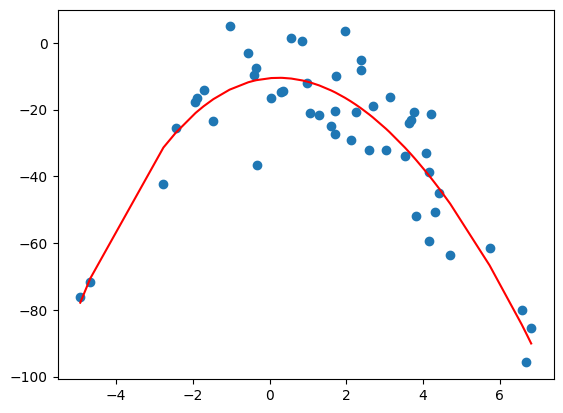

Degree: 4	RMSE train: 10.242742	RMSE val: 14.115774


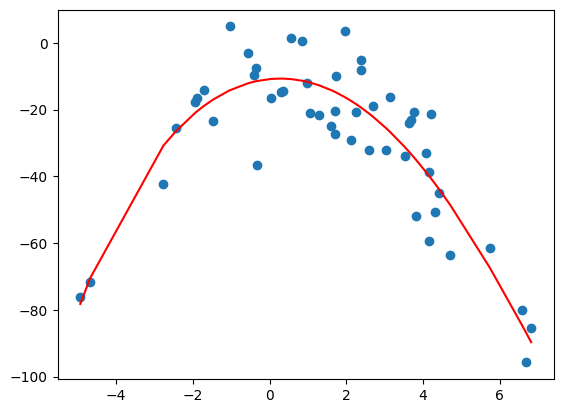

Degree: 5	RMSE train: 10.240287	RMSE val: 16.155191


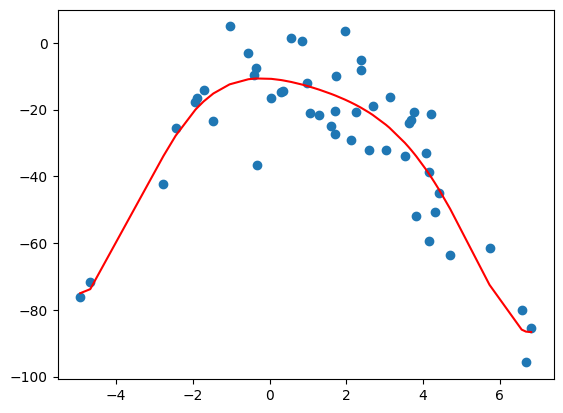

Degree: 6	RMSE train: 10.130808	RMSE val: 64.228159


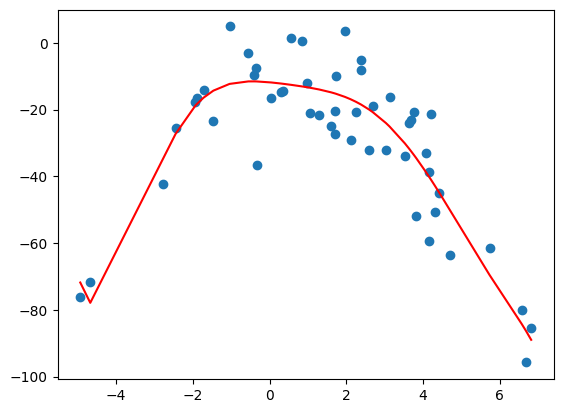

Degree: 7	RMSE train: 10.061873	RMSE val: 191.027635


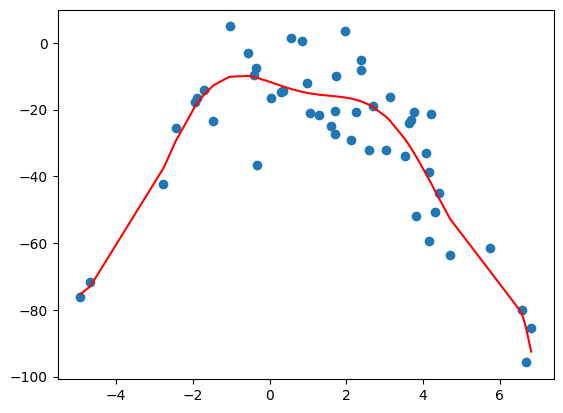

Degree: 8	RMSE train: 9.919637	RMSE val: 205.115940


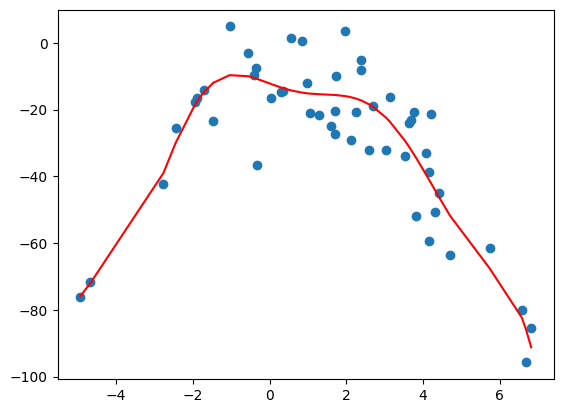

Degree: 9	RMSE train: 9.904506	RMSE val: 470.424507


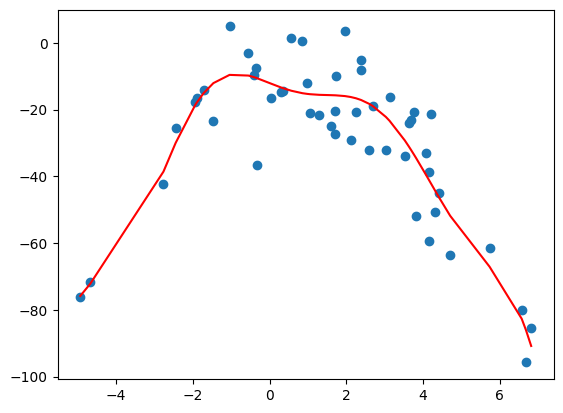

Degree: 10	RMSE train: 9.902973	RMSE val: 212.870970


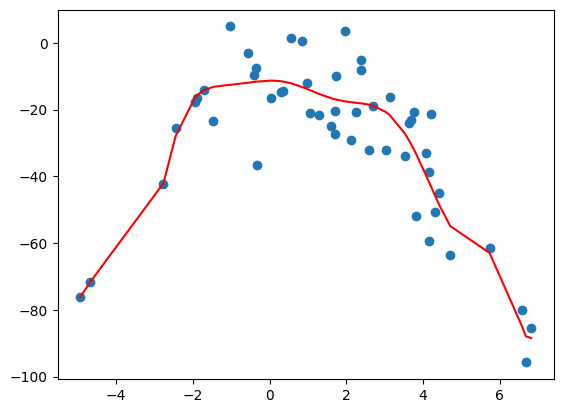

Degree: 11	RMSE train: 9.750676	RMSE val: 9980.506375


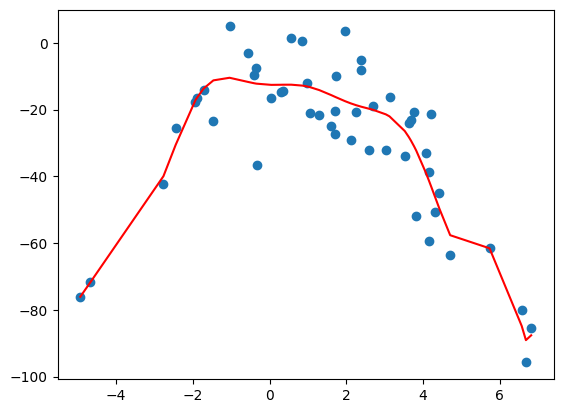

Degree: 12	RMSE train: 9.692834	RMSE val: 16167.778927


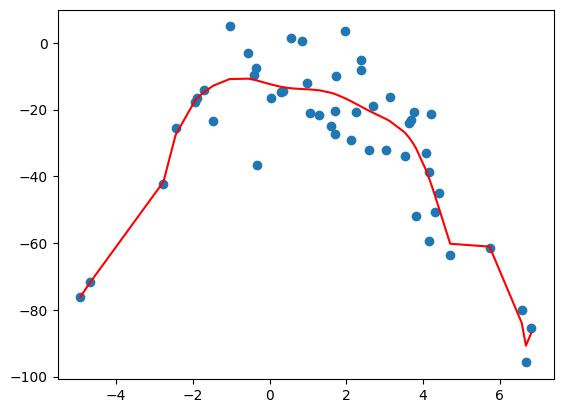

Degree: 13	RMSE train: 9.644158	RMSE val: 76056.769053


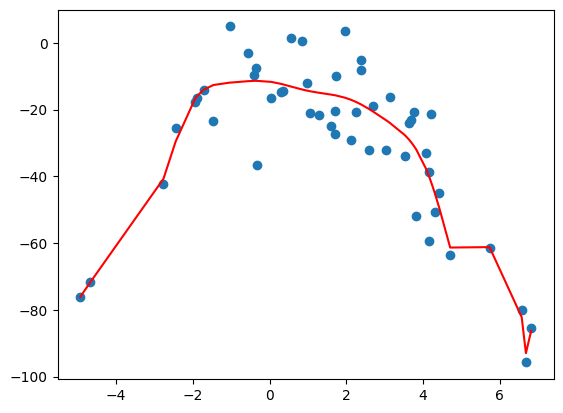

Degree: 14	RMSE train: 9.616132	RMSE val: 176703.056385


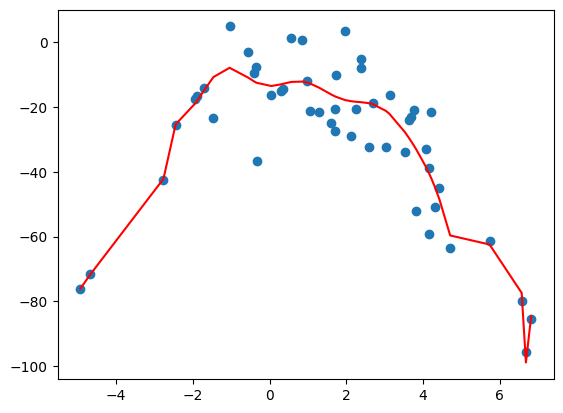

Degree: 15	RMSE train: 9.451415	RMSE val: 1940482.497121


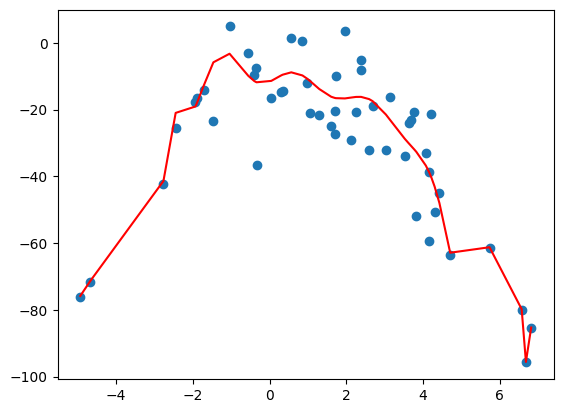

Degree: 16	RMSE train: 9.438159	RMSE val: 8385552.585993


In [14]:
from mlrcv.regression import *

##################################################################################
# call here your functions. You should:
# - calculate the function parameters theta (vector of thetas)
# - infer the y_val_pred values given x_val and the calculated theta with degree=d
# - calculate the RMSE for the model
##################################################################################

for d in range(4, 17):
    model = NonLinearRegression()
    model.calculate_theta(x_train, y_train, degree=d)
    y_pred = model.predict_y(x_train)

    plot_regression(x_train, y_train, y_pred)
    y_val_pred = model.predict_y(x_val)
    # print root mean square error for train and validation sets
    train_rmse = rmse(y_train, y_pred)
    val_rmse = rmse(y_val, y_val_pred)
    print('Degree: %d\tRMSE train: %f\tRMSE val: %f' % (d, train_rmse, val_rmse))

From the plots above you can notice that, as the polynom degree increase, the train RMSE value decrease, however for the validation set the RMSE increases. Why does this happen?

- *Answer here*

**Assignment Submission**

---

You should zip and submit the ```ex2_regression.ipynb``` file together with all the ```.py``` files inside the ```mlrcv/``` directory.

You can automatically generate the submission file using the provided ```zip_submission.sh``` script by running:

```
bash zip_submission.sh
```

This will zip the necessary files for your submission and generate the ```ex2_mlrcv_submission.zip``` file to be submit via ecampus.